Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2, ceil

# Find the Root of the Function

Let's start by looking at a sample function and plotting it

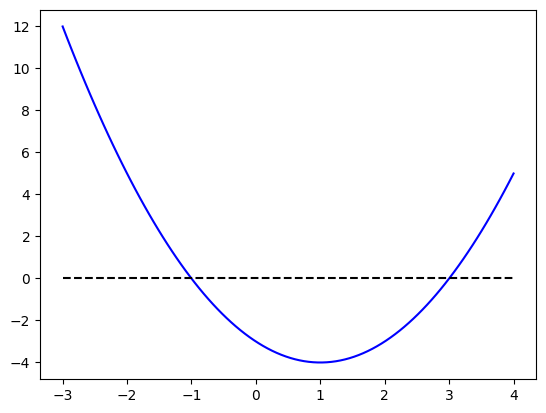

In [3]:
# original function
def f(x):
    return x**2 - 2*x - 3

# first derivative
def df(x):
    return 2*x - 2

# second derivative
def ddf(x):
    return 2

x = np.linspace(-3,4,100)

plt.plot(x,f(x),'b-')
plt.plot(x,np.zeros_like(x),'k--')
plt.show()

# Bisection Method

Bisection method algorithm

In [4]:
def bisection(func,dFunc,x0,x1,tol):
    #==================================================================
    # INPUTS
    # - func: input function
    # - dFunc: derivative input function
    # - x0: left bound
    # - x1: right bound
    # - tol: tolerance
    # OUTPUTS
    # - xNew: estimated root
    # - iterations: iteration array
    # - errors: error array
    #==================================================================

    print('*** BISECTION METHOD ***')

    i = 1
    iterations = []
    errors = []
    condition = True

    while condition:
        # bisection algorithm
        xNew = (x0 + x1) / 2

        # lucky guess
        if func(xNew) == 0:
            break

        if func(x0)*func(xNew) < 0:
            x1 = xNew
        else:
            x0 = xNew

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

How many iterations will it take to converge?

In [5]:
def bisectionNumIterations():
    #==================================================================
    # INPUTS
    # -
    # OUTPUT
    # -
    #==================================================================
    return 0

Test the algorithm and plot it

*** BISECTION METHOD ***
Estimated root: -1.0000009536743164
Iterations to converge: 21
Final error: 9.53674089032683e-07


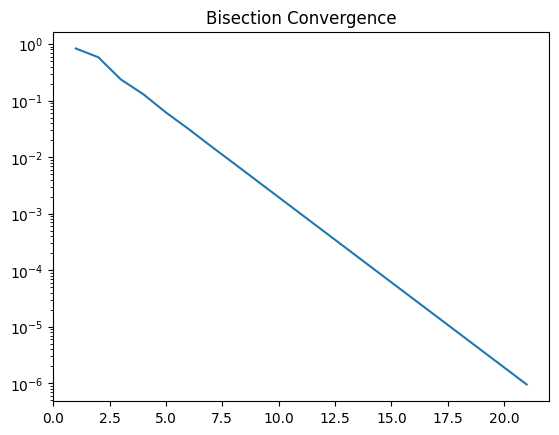

In [8]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = bisection(f,df,x0,x1,tol)

print(f'Estimated root: {xNew}')
print(f'Iterations to converge: {iterations[-1]}')
print(f'Final error: {errors[-1]}')

plt.semilogy(iterations,errors)
plt.title('Bisection Convergence')
plt.show()

# Secant Method

Secant method algorithm

In [10]:
def secant(func,dFunc,x0,x1,tol):
    #==================================================================
    # INPUTS
    # - func: input function
    # - dFunc: derivative input function
    # - x0: left bound
    # - x1: right bound
    # - tol: tolerance
    # OUTPUTS
    # - xNew: estimated root
    # - iterations: iteration array
    # - errors: error array
    #==================================================================

    print('*** SECANT METHOD ***')

    i = 1
    iterations = []
    errors = []
    condition = True

    while condition:
        # stop if too many iterations
        if i > 5000:
            print('ERROR: not convergent within 5000 iterations')
            break

        # prevent divide by zero
        if func(x1)-func(x0) == 0:
            print('ERROR: Divide by zero')
            break

        # secant method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))
        x0 = x1
        x1 = xNew

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

Test the algorithm and plot it

*** SECANT METHOD ***
Estimated root: -0.9999999997671694
Iterations to converge: 9
Final error: 2.328306436809747e-10


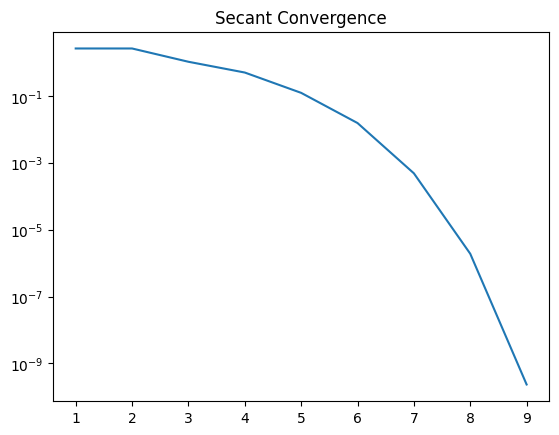

In [11]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = secant(f,df,x0,x1,tol)

print(f'Estimated root: {xNew}')
print(f'Iterations to converge: {iterations[-1]}')
print(f'Final error: {errors[-1]}')

plt.semilogy(iterations,errors)
plt.title('Secant Convergence')
plt.show()

# Regula-Falsi Method

Regula-Falsi method algorithm

In [12]:
def regula_falsi(func,dFunc,x0,x1,tol):
    #==================================================================
    # INPUTS
    # - func: input function
    # - dFunc: derivative input function
    # - x0: left bound
    # - x1: right bound
    # - tol: tolerance
    # OUTPUTS
    # - xNew: estimated root
    # - iterations: iteration array
    # - errors: error array
    #==================================================================

    print('*** REGULA-FALSI METHOD ***')

    i = 1
    iterations = []
    errors = []
    condition = True

    while condition:
        # stop if too many iterations
        if i > 5000:
            print('ERROR: not convergent within 5000 iterations')
            break

        # prevent divide by zero
        if func(x1)-func(x0) == 0:
            print('ERROR: Divide by zero')
            break

        # regula-falsi method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))
        
        if func(x0)*func(xNew) < 0:
            x1 = xNew
        else:
            x0 = xNew

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

Test the algorithm and plot it

*** REGULA-FALSI METHOD ***
Estimated root: -0.999999046325911
Iterations to converge: 22
Final error: 9.536743164061416e-07


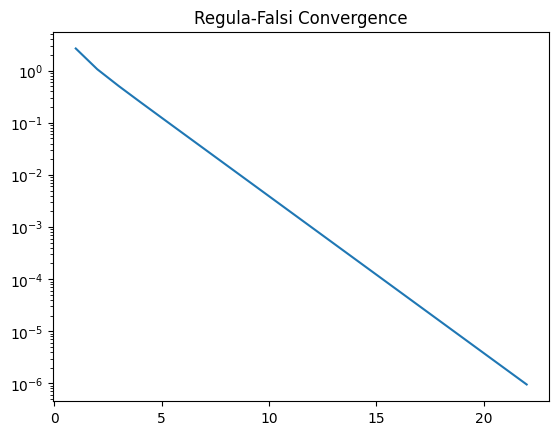

In [14]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = regula_falsi(f,df,x0,x1,tol)

print(f'Estimated root: {xNew}')
print(f'Iterations to converge: {iterations[-1]}')
print(f'Final error: {errors[-1]}')

plt.semilogy(iterations,errors)
plt.title('Regula-Falsi Convergence')
plt.show()

# Fixed Point Iterative Method

Define functions of the form `x = g(x)` and plot them

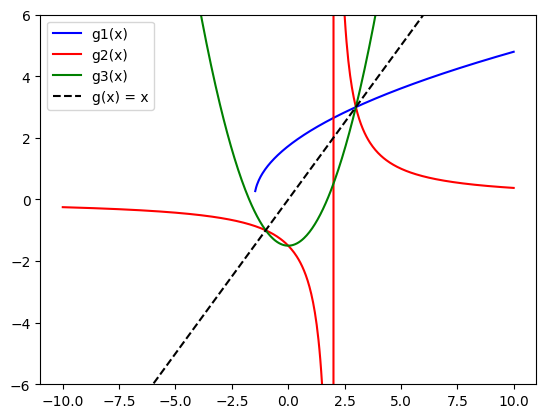

In [17]:
def g1(x):
    return np.sqrt(2*x + 3)

def g2(x):
    return 3 / (x-2)

def g3(x):
    return (x**2 - 3) / 2

x = np.linspace(-10,10,500)

plt.plot(x[x>=-3/2],g1(x[x>=-3/2]),'b-',label='g1(x)')
plt.plot(x,g2(x),'r-',label='g2(x)')
plt.plot(x,g3(x),'g-',label='g3(x)')
plt.plot(x,x,'k--',label='g(x) = x')
plt.ylim([-6,6])
plt.legend()
plt.show()

Range of convergence

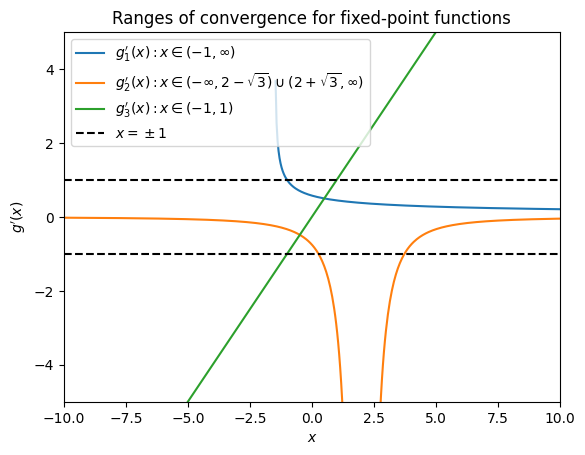

In [19]:
def dg1(x):
    return (2*x + 3)**(-1/2)

def dg2(x):
    return -3 * (x-2)**(-2)

def dg3(x):
    return x

x = np.linspace(-10,10,500)

plt.plot(x[x>-3/2],dg1(x[x>-3/2]),label=r'$g^\prime_1(x): x \in (-1,\infty)$')
plt.plot(x,dg2(x),label=r'$g^\prime_2(x): x \in (-\infty,2-\sqrt{3}) \cup (2+\sqrt{3},\infty)$')
plt.plot(x,dg3(x),label=r'$g^\prime_3(x): x \in (-1,1)$')
plt.plot(x,-1*np.ones_like(x),'k--',label=r'$x = \pm 1$')
plt.plot(x,np.ones_like(x),'k--')
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.xlabel(r'$x$')
plt.ylabel(r'$g^\prime(x)$')
plt.title('Ranges of convergence for fixed-point functions')
plt.legend()
plt.show()

Fixed-point iterative algorithm

In [20]:
def fixed_point_iteration(func,dFunc,gFunc,x,tol):
    #==================================================================
    # INPUTS
    # - func: input function
    # - dFunc: derivative input function
    # - x: initial guess
    # - tol: tolerance
    # OUTPUTS
    # - xNew: estimated root
    # - iterations: iteration array
    # - errors: error array
    #==================================================================

    print('*** FIXED-POINT ITERATIVE METHOD ***')

    i = 1
    iterations = []
    errors = []
    condition = True

    while condition:
        # stop if too many iterations
        if i > 5000:
            print('ERROR: not convergent within 5000 iterations')
            break

        # prevent divide by zero
        if func(x1)-func(x0) == 0:
            print('ERROR: Divide by zero')
            break

        # fixed-point iteration
        x = gFunc(x)

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

Test the algorithm and plot it

*** FIXED-POINT ITERATIVE METHOD ***
*** FIXED-POINT ITERATIVE METHOD ***
*** FIXED-POINT ITERATIVE METHOD ***


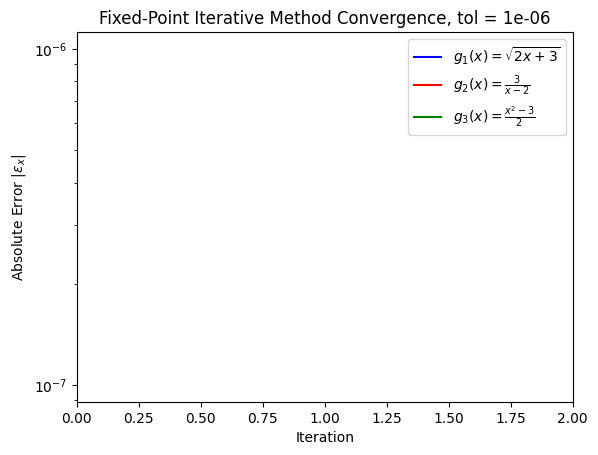

In [23]:
x0 = -0.5
tol = 1e-6

xNew1, iterations1, errors1 = fixed_point_iteration(f,df,g1,x0,tol)
xNew2, iterations2, errors2 = fixed_point_iteration(f,df,g2,x0,tol)
xNew3, iterations3, errors3 = fixed_point_iteration(f,df,g3,x0,tol)

plt.semilogy(iterations1,errors1,'b',label=r'$g_1(x) = \sqrt{2x+3}$')
plt.semilogy(iterations2,errors2,'r',label=r'$g_2(x) = \frac{3}{x-2}$')
plt.semilogy(iterations3,errors3,'g',label=r'$g_3(x) = \frac{x^2-3}{2}$')
plt.xlim([0,max(iterations1[-1],iterations2[-1])+1])
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Fixed-Point Iterative Method Convergence, tol = {tol}')
plt.legend()
plt.show()

# Newton-Raphson Method

Newton-Raphson method algorithm

In [11]:
def newton_raphson(func,dFunc,x,tol):
    #==================================================================
    # INPUTS
    # - func: input function
    # - dFunc: derivative input function
    # - x: initial guess
    # - tol: tolerance
    # OUTPUTS
    # - xNew: estimated root
    # - iterations: iteration array
    # - errors: error array
    #==================================================================

    print('*** NEWTON-RAPHSON METHOD ***')

    i = 1
    iterations = []
    errors = []
    condition = True

    while condition:
        # stop if too many iterations
        if i > 5000:
            print('ERROR: not convergent within 5000 iterations')
            break

        # prevent divide by zero
        if func(x1)-func(x0) == 0:
            print('ERROR: Divide by zero')
            break

        # fixed-point iteration for Newton's method
        x = 

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

Visualize fixed-point function

In [12]:
def g():
    return 0

Range of convergence

In [13]:
def dg():
    return 0

Test the algorithm and plot it

# Compare Methods

Compute the roots of the function with each method

Plot the convergence for all methods